# Gradient Boosting Machines (GBMs) with XGBoost

## Problem Statement

Applying Gradient boosting to a real-world dataset from the [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales) competition on Kaggle:

> Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. 
>
>
> With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
>
> View and download the data here: https://www.kaggle.com/c/rossmann-store-sales/data

## Data Preparation

In [1]:
import pandas as pd

In [2]:
ross_df = pd.read_csv("../data/rossmann-store-sales/train.csv", low_memory=False)
store_df = pd.read_csv("../data/rossmann-store-sales/store.csv")
test_df = pd.read_csv("../data/rossmann-store-sales/test.csv")
submission_df = pd.read_csv("../data/rossmann-store-sales/sample_submission.csv")

In [13]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


Merge data to have all the required data at one place

In [9]:
merged_df = ross_df.merge(store_df, how="left", on="Store")
merged_test_df = test_df.merge(store_df, how="left", on="Store")

In [10]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Date

Convert the `date` to a `datecolumn` and extract different parts of the date.

In [16]:
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    df["WeekOfYear"] = df.Date.dt.isocalendar().week

In [17]:
split_date(merged_df)
split_date(merged_test_df)

In [18]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


### Store Open/Closed

In [20]:
merged_df[merged_df.Open == 0].Sales.value_counts() # check the sales on the days it's closed

Sales
0    172817
Name: count, dtype: int64

Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [21]:
merged_df = merged_df[merged_df.Open == 1].copy()

### Competition

`CompetitionOpenSince[Month/Year]` columns from `store_df` can be used to compute the number of months for which a competitor has been open near the store.

In [22]:
merged_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
770579,900,6,2013-08-10,4992,462,1,0,0,0,a,...,4.0,2005.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,8,10,32
680147,783,3,2013-10-30,7323,798,1,0,0,1,d,...,NaN,NaN,0,NaN,NaN,NaN,2013,10,30,44
530585,631,4,2014-03-13,4367,565,1,0,0,0,d,...,NaN,NaN,1,35.0,2012.0,"Mar,Jun,Sept,Dec",2014,3,13,11
401289,416,2,2014-07-08,9149,1205,1,0,0,0,a,...,6.0,2014.0,0,NaN,NaN,NaN,2014,7,8,28
826750,206,4,2013-06-20,6711,771,1,1,0,0,a,...,NaN,NaN,1,14.0,2012.0,"Jan,Apr,Jul,Oct",2013,6,20,25
217490,66,6,2015-01-17,6932,609,1,0,0,0,d,...,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2015,1,17,3
411811,47,5,2014-06-27,5691,729,1,0,0,0,a,...,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct",2014,6,27,26
522988,839,4,2014-03-20,5721,728,1,1,0,0,c,...,1.0,2015.0,0,NaN,NaN,NaN,2014,3,20,12
80915,636,3,2015-05-20,6510,706,1,1,0,0,c,...,10.0,2004.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,5,20,21
739322,863,6,2013-09-07,5745,718,1,0,0,0,a,...,11.0,2010.0,0,NaN,NaN,NaN,2013,9,7,36


Instead of giving the model, the month and year of the competitation open, we can give the number of months the store has been opened.

In [23]:
def comp_months(df):
    df["CompetitionOpen"] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (
        df.Month - df.CompetitionOpenSinceMonth
    )
    df["CompetitionOpen"] = (
        df["CompetitionOpen"].map(lambda x: 0 if x < 0 else x).fillna(0)
    )

In [24]:
comp_months(merged_df)
comp_months(merged_test_df)

In [25]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [26]:
def check_promo_month(row):
  month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
      months = (row['PromoInterval'] or '').split(',')
      if row['Promo2Open'] and month2str[row['Month']] in months:
          return 1
      else:
          return 0
  except Exception:
      return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [27]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [28]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


### Input and Target Columns

Select the columns that we'll be used for training.

In [29]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [30]:
input_cols = [
    "Store",
    "DayOfWeek",
    "Promo",
    "StateHoliday",
    "SchoolHoliday",
    "StoreType",
    "Assortment",
    "CompetitionDistance",
    "CompetitionOpen",
    "Day",
    "Month",
    "Year",
    "WeekOfYear",
    "Promo2",
    "Promo2Open",
    "IsPromo2Month",
]
target_col = "Sales"

In [31]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [32]:
test_inputs = merged_test_df[input_cols].copy()

Numerical and Categorical Columns

In [34]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Promo                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   CompetitionOpen      844392 non-null  float64
 9   Day                  844392 non-null  int32  
 10  Month                844392 non-null  int32  
 11  Year                 844392 non-null  int32  
 12  WeekOfYear           844392 non-null  UInt32 
 13  Promo2               844392 non-null  int64  
 14  Promo2Open           844392 non-null  float64
 15  IsPromo2Month        

In [35]:
numeric_cols = [
    "Store",
    "Promo",
    "SchoolHoliday",
    "CompetitionDistance",
    "CompetitionOpen",
    "Promo2",
    "Promo2Open",
    "IsPromo2Month",
    "Day",
    "Month",
    "Year",
    "WeekOfYear",
]
categorical_cols = ["DayOfWeek", "StateHoliday", "StoreType", "Assortment"]


### Impute missing numerical data

In [38]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [37]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Competition distance is the only missing values we can assign it to the max value.

In [39]:
max_distance = inputs.CompetitionDistance.max()

In [41]:
inputs.fillna({"CompetitionDistance": max_distance}, inplace=True)
test_inputs.fillna({"CompetitionDistance": max_distance}, inplace=True)

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [43]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### One Hot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(
    inputs[categorical_cols]
)
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [48]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [49]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions from the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)


### Training

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [53]:
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

### Prediction

In [55]:
preds = model.predict(X)
preds

array([ 7960.1133,  7581.974 ,  7993.401 , ...,  7101.1714,  8794.572 ,
       10820.442 ], shape=(844392,), dtype=float32)

### Evaluation

In [59]:
from sklearn.metrics import root_mean_squared_error


def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

In [60]:
rmse(targets, preds)

2397.161376953125

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [62]:
importance_df = pd.DataFrame(
    {"feature": X.columns, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)


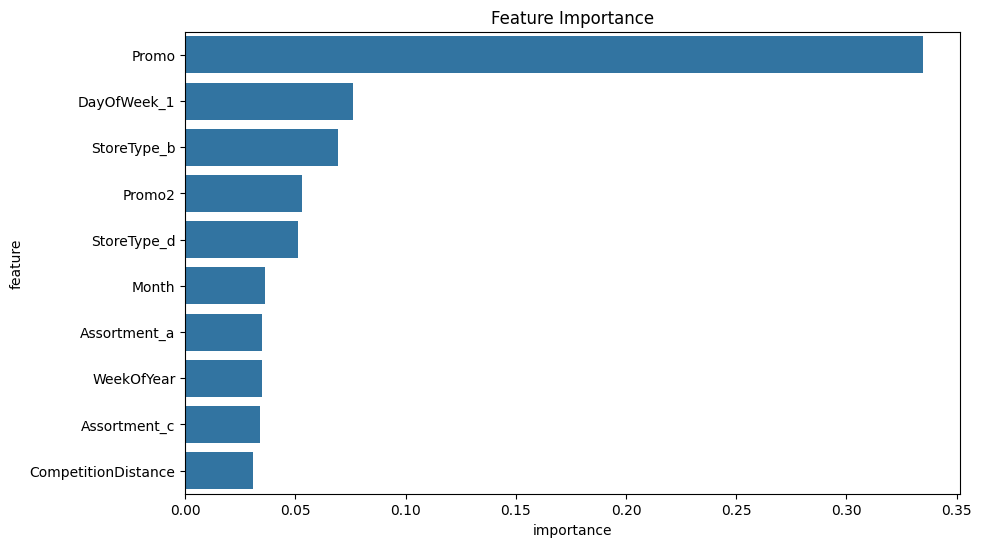

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature");

From the graph, it shows that `Promo` has more impact for the model feature importance.

## K Fold Cross Validation

Using **K Fold Cross Validation** to create valdiation sets for the model.

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

In [65]:
from sklearn.model_selection import KFold

In [ ]:
# helper function to train and evaluate the model
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(train_targets, model.predict(X_train))
    val_rmse = rmse(val_targets, model.predict(X_val))
    return model, train_rmse, val_rmse


In [68]:
kfold = KFold(n_splits=5)

In [69]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(
        X_train, train_targets, X_val, val_targets, max_depth=4, n_estimators=20
    )
    models.append(model)
    print("Train RMSE: {}, Validation RMSE: {}".format(train_rmse, val_rmse))

Train RMSE: 2394.787841796875, Validation RMSE: 2462.850341796875
Train RMSE: 2401.158203125, Validation RMSE: 2449.841796875
Train RMSE: 2411.892822265625, Validation RMSE: 2391.591064453125
Train RMSE: 2344.831298828125, Validation RMSE: 2440.04443359375
Train RMSE: 2391.154541015625, Validation RMSE: 2460.874267578125


In [70]:
import numpy as np

# Average  perditions from 5 different models
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)


In [71]:
preds = predict_avg(models, X)
preds

array([8031.8696, 7536.164 , 8671.131 , ..., 7181.968 , 7955.146 ,
       9629.75  ], shape=(844392,), dtype=float32)

In [72]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(
            X_train, train_targets, X_val, val_targets, **params
        )
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print(
        "Train RMSE: {}, Validation RMSE: {}".format(
            np.mean(train_rmses), np.mean(val_rmses)
        )
    )
    return models


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [76]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(train_targets, model.predict(X_train))
    val_rmse = rmse(val_targets, model.predict(X_val))
    print("Train RMSE: {}, Validation RMSE: {}".format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [80]:
estimators = [10, 20, 30, 50, 100, 250, 300]

for index, estimate in enumerate(estimators):
    print(
        f"{index + 1} `n_estimators: {estimate}`"
    )
    test_params(n_estimators=estimate)

1 `n_estimators: 10`
Train RMSE: 2358.880859375, Validation RMSE: 2381.574462890625
2 `n_estimators: 20`
Train RMSE: 2049.72509765625, Validation RMSE: 2072.745849609375
3 `n_estimators: 30`
Train RMSE: 1828.4591064453125, Validation RMSE: 1853.852783203125
4 `n_estimators: 50`
Train RMSE: 1533.5650634765625, Validation RMSE: 1560.385986328125
5 `n_estimators: 100`
Train RMSE: 1154.4632568359375, Validation RMSE: 1180.50634765625
6 `n_estimators: 250`
Train RMSE: 882.4757080078125, Validation RMSE: 917.1865844726562
7 `n_estimators: 300`
Train RMSE: 845.5125732421875, Validation RMSE: 883.7652587890625


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
depths = [2, 5, 10]

for index, depth in enumerate(depths):
    print(f"{index + 1} `max_depth: {depth}`")
    test_params(max_depth=estimate)

1 `max_depth: 2`
Train RMSE: 0.0008656097925268114, Validation RMSE: 995.5674438476562
2 `max_depth: 5`


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
learning_rates = [0.01, 0.1, 0.3, 0.9, 0.99]

for index, rate in enumerate(learning_rates):
    print(f"{index + 1} `learning_rate: {rate}`")
    test_params(learning_rate=estimate)

#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [ ]:
test_params(booster='gblinear')

## Putting it Together and Making Predictions

Train the final model on the entire training set with custom hyperparameters. 

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

### Data Preparation

In [ ]:
# Load and Read Data
ross_df = pd.read_csv("../data/rossmann-store-sales/train.csv", low_memory=False)
store_df = pd.read_csv("../data/rossmann-store-sales/store.csv")
store_df = pd.read_csv("../data/rossmann-store-sales/test.csv")
submission_df = pd.read_csv("../data/rossmann-store-sales/sample_submission.csv")

In [3]:
# Helper functions
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    df["WeekOfYear"] = df.Date.dt.isocalendar().week

def comp_months(df):
    df["CompetitionOpen"] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (
        df.Month - df.CompetitionOpenSinceMonth
    )
    df["CompetitionOpen"] = (
        df["CompetitionOpen"].map(lambda x: 0 if x < 0 else x).fillna(0)
    )

def check_promo_month(row):
    month2str = {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sept",
        10: "Oct",
        11: "Nov",
        12: "Dec",
    }
    try:
        months = (row["PromoInterval"] or "").split(",")
        if row["Promo2Open"] and month2str[row["Month"]] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0


def promo_cols(df):
    # Months since Promo2 was open
    df["Promo2Open"] = (
        12 * (df.Year - df.Promo2SinceYear)
        + (df.WeekOfYear - df.Promo2SinceWeek) * 7 / 30.5
    )
    df["Promo2Open"] = (
        df["Promo2Open"].map(lambda x: 0 if x < 0 else x).fillna(0) * df["Promo2"]
    )
    # Whether a new round of promotions was started in the current month
    df["IsPromo2Month"] = df.apply(check_promo_month, axis=1) * df["Promo2"]

In [4]:
# input and target columns
input_cols = [
    "Store",
    "DayOfWeek",
    "Promo",
    "StateHoliday",
    "SchoolHoliday",
    "StoreType",
    "Assortment",
    "CompetitionDistance",
    "CompetitionOpen",
    "Day",
    "Month",
    "Year",
    "WeekOfYear",
    "Promo2",
    "Promo2Open",
    "IsPromo2Month",
]
target_col = "Sales"
numeric_features = [
    "Store",
    "Promo",
    "SchoolHoliday",
    "CompetitionDistance",
    "CompetitionOpen",
    "Promo2",
    "Promo2Open",
    "IsPromo2Month",
    "Day",
    "Month",
    "Year",
    "WeekOfYear",
]
categorical_features = ["DayOfWeek", "StateHoliday", "StoreType", "Assortment"]

### Data Preprocessing

In [5]:
# Merge Data
merged_df = ross_df.merge(store_df, how="left", on="Store")
merged_test_df = test_df.merge(store_df, how="left", on="Store")

# Feed the model only the day when the store was open
merged_df = merged_df[merged_df.Open == 1].copy()

# Split date field into different date fields
split_date(merged_df)
split_date(merged_test_df)

# CompititionOpen in number of months
comp_months(merged_df)
comp_months(merged_test_df)

# Promos currently running and number of months since promo was open
promo_cols(merged_df)
promo_cols(merged_test_df)

inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()
test_inputs = merged_test_df[input_cols].copy()

# maximum distance of the competition
max_distance = inputs.CompetitionDistance.max()

inputs.fillna({"CompetitionDistance": max_distance}, inplace=True)
test_inputs.fillna({"CompetitionDistance": max_distance}, inplace=True)

preprocessor = ColumnTransformer(
    [
        ("num", MinMaxScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_features),
    ]
)

X = inputs
X_test = test_inputs

### Model Training and Evaluation

In [6]:
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)),
    ]
)


In [7]:
%%time
pipeline.fit(X, targets)

CPU times: user 1min 30s, sys: 4.67 s, total: 1min 35s
Wall time: 20.9 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Store', 'Promo',
                                                   'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'CompetitionOpen', 'Promo2',
                                                   'Promo2Open',
                                                   'IsPromo2Month', 'Day',
                                                   'Month', 'Year',
                                                   'WeekOfYear']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DayOfWeek', 'StateHoliday',
                                                   'StoreType',
                                                   'Assortment...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [8]:
test_preds = pipeline.predict(X_test)

Let's add the predictions into submission_df

In [11]:
submission_df["Sales"] = test_preds

In [12]:
submission_df["Sales"] = submission_df["Sales"] * test_df.Open.fillna(1.0)

In [13]:
submission_df

,Id,Sales
0,1,3800.547363
1,2,8387.832031
2,3,8954.212891
3,4,7166.940430
4,5,6861.939453
...,...,...
41083,41084,2916.441406
41084,41085,6698.847656
41085,41086,6492.224121
41086,41087,22613.781250


Save submissions to `.csv` file

In [14]:
submission_df.to_csv("../data/rossmann-store-sales/submission.csv", index=None)